<a href="https://colab.research.google.com/github/Madhavi2075/OIB-SIP/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Install dependencies
!pip install pandas numpy matplotlib seaborn plotly statsmodels

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
from google.colab import files
uploaded = files.upload()  # choose IRIS.csv from your machine
# Now the CSV is available in the Colab working directory

Saving Unemployment in India (1).csv to Unemployment in India (1) (1).csv


In [30]:
import pandas as pd
path = 'Unemployment in India (1).csv'
df = pd.read_csv(path)
print(df.shape)
print(df.columns.tolist())
df.head()
df.info()
df.isnull().sum()


(768, 7)
['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [32]:
import pandas as pd
import numpy as np

# Load
df = pd.read_csv('Unemployment in India (1).csv')

# 1) Normalize column names
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]
# Now we expect: region, date, frequency, estimated_unemployment_rate_(%), estimated_employed, estimated_labour_participation_rate_(%), area

# 2) Rename handy columns
df = df.rename(columns={
    'estimated_unemployment_rate_(%)': 'unemp_rate',
    'estimated_employed': 'employed',
    'estimated_labour_participation_rate_(%)': 'lfpr'
})

# 3) Parse date (original format DD-MM-YYYY)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# 4) Clean text columns
df['region'] = df['region'].astype(str).str.strip().str.title()
df['area'] = df['area'].astype(str).str.strip().str.title()
df['frequency'] = df['frequency'].astype(str).str.strip().str.title()

# 5) Ensure numeric
df['unemp_rate'] = pd.to_numeric(df['unemp_rate'], errors='coerce')
df['employed'] = pd.to_numeric(df['employed'], errors='coerce')
df['lfpr'] = pd.to_numeric(df['lfpr'], errors='coerce')

# 6) Create time features
df = df.dropna(subset=['date', 'region'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')  # good for grouping

# 7) Impute missing unemp_rate sensibly (forward then backward per region+area)
df['unemp_rate'] = df.groupby(['region','area'])['unemp_rate'].apply(lambda s: s.fillna(method='ffill').fillna(method='bfill'))

# 8) Final check
print("Rows:", len(df))
print("Nulls (unemp_rate):", df['unemp_rate'].isna().sum())


Rows: 0
Nulls (unemp_rate): 0


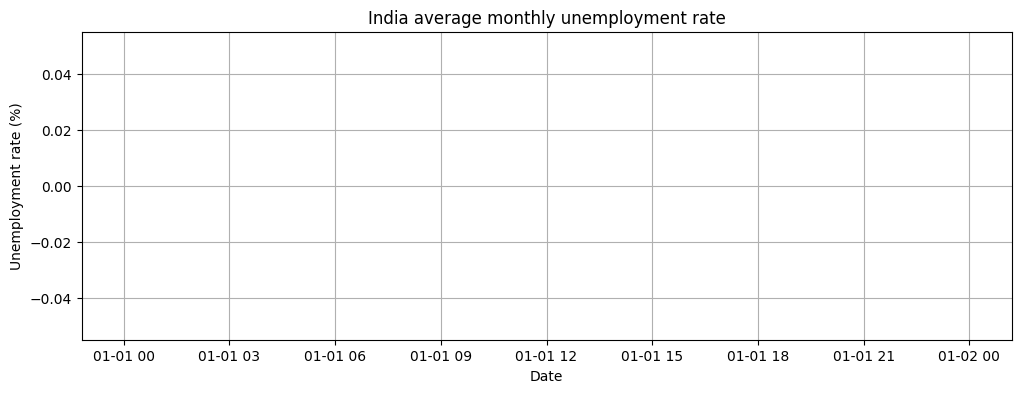

In [33]:
import matplotlib.pyplot as plt

national = df.groupby('year_month')['unemp_rate'].mean().astype(float)
national.index = national.index.to_timestamp()   # convert to timestamps for plotting

plt.figure(figsize=(12,4))
plt.plot(national.index, national.values, marker='o')
plt.title('India average monthly unemployment rate')
plt.ylabel('Unemployment rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [50]:
import pandas as pd

df = pd.read_csv('Unemployment in India (1).csv')
print(df.shape)
print(df.head())


(768, 7)
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [51]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [52]:
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

df = df.rename(columns={
    'estimated_unemployment_rate_(%)':'unemp_rate',
    'estimated_employed':'employed',
    'estimated_labour_participation_rate_(%)':'lfpr'
})

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['unemp_rate'] = pd.to_numeric(df['unemp_rate'], errors='coerce')

print(df.head())
print(df['region'].unique()[:10])


           region       date frequency  unemp_rate    employed   lfpr   area
0  Andhra Pradesh 2019-05-31   Monthly        3.65  11999139.0  43.24  Rural
1  Andhra Pradesh 2019-06-30   Monthly        3.05  11755881.0  42.05  Rural
2  Andhra Pradesh 2019-07-31   Monthly        3.75  12086707.0  43.50  Rural
3  Andhra Pradesh 2019-08-31   Monthly        3.32  12285693.0  43.97  Rural
4  Andhra Pradesh 2019-09-30   Monthly        5.17  12256762.0  44.68  Rural
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir']


/tmp/ipython-input-2451201686.py:9: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [53]:
print("Rows:", len(df))


Rows: 768


In [54]:
df = df.dropna(subset=['region', 'unemp_rate'])
print("Rows after cleaning:", len(df))


Rows after cleaning: 740


In [55]:
state_avg = df.groupby('region')['unemp_rate'].mean().sort_values(ascending=False)
print(state_avg.head())


region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: unemp_rate, dtype: float64


In [60]:
# Ensure date column is parsed correctly
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create year_month column
df['year_month'] = df['date'].dt.to_period('M')

print(df[['date','year_month']].head())


        date year_month
0 2019-05-31    2019-05
1 2019-06-30    2019-06
2 2019-07-31    2019-07
3 2019-08-31    2019-08
4 2019-09-30    2019-09


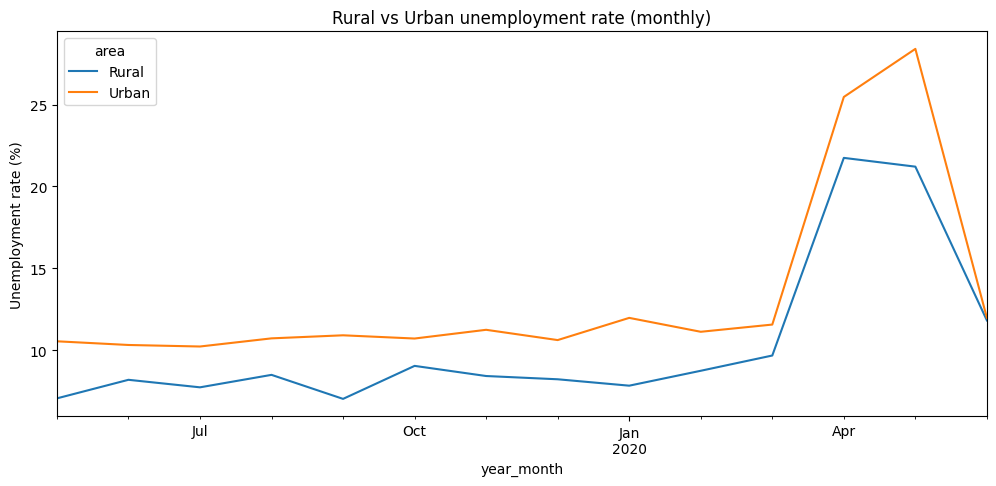

In [61]:
area_avg = df.groupby(['year_month','area'])['unemp_rate'].mean().unstack()
area_avg.index = area_avg.index.to_timestamp()
area_avg.plot(figsize=(12,5), title='Rural vs Urban unemployment rate (monthly)')
plt.ylabel('Unemployment rate (%)')
plt.show()


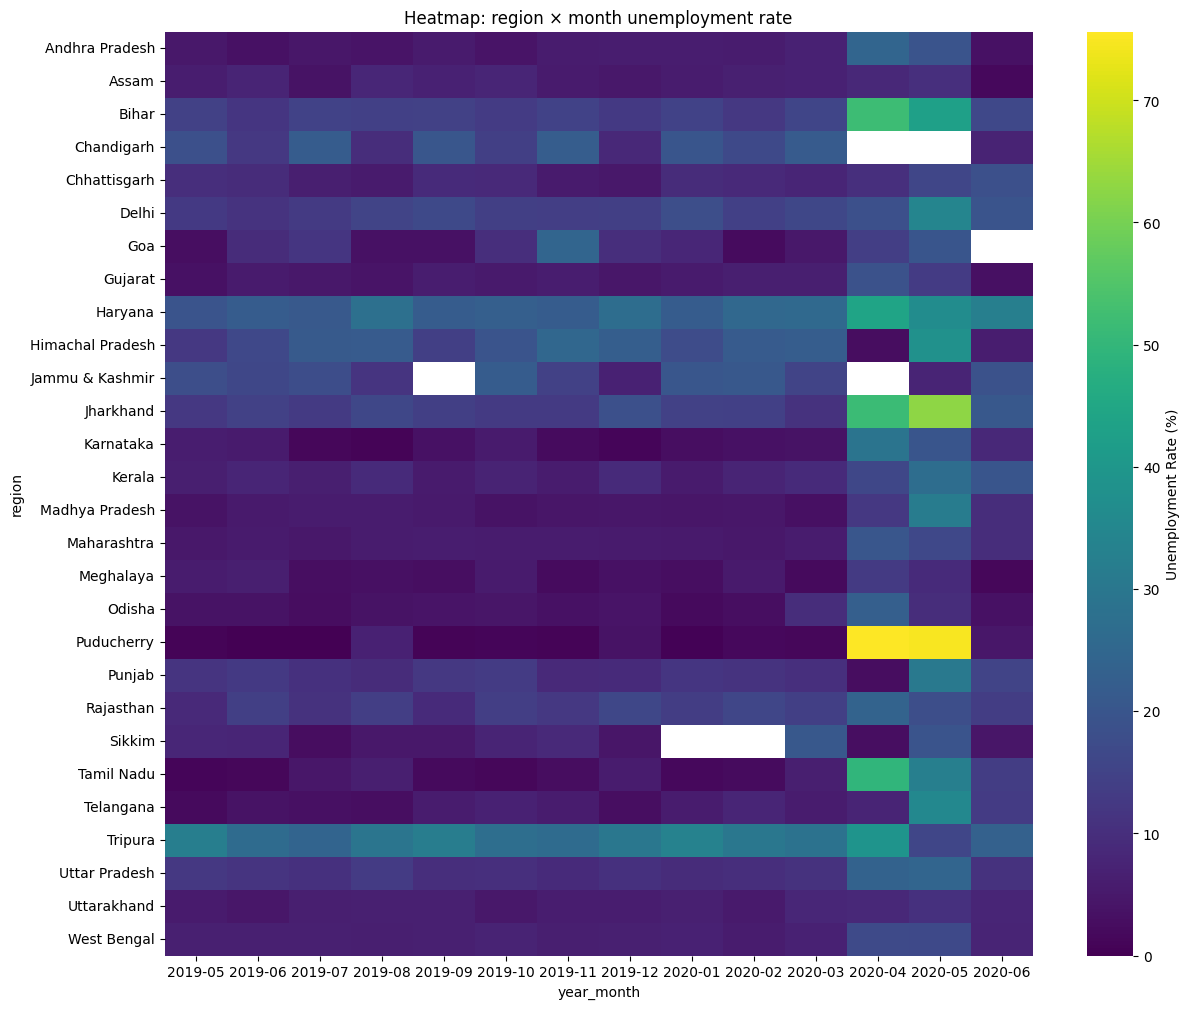

In [62]:
import seaborn as sns
pivot = df.pivot_table(index='region', columns='year_month', values='unemp_rate')
# limit columns for readability: pivot = pivot.iloc[:, -48:]  # last 48 months
plt.figure(figsize=(14,12))
sns.heatmap(pivot, cmap='viridis', cbar_kws={'label':'Unemployment Rate (%)'})
plt.title('Heatmap: region × month unemployment rate')
plt.show()


In [63]:
pre = df[df['date'] < '2020-03-01']
during = df[(df['date'] >= '2020-03-01') & (df['date'] <= '2021-12-31')]

pre_mean = pre.groupby('region')['unemp_rate'].mean()
during_mean = during.groupby('region')['unemp_rate'].mean()
delta = (during_mean - pre_mean).dropna().sort_values(ascending=False)
print(delta.head(15))


region
Puducherry        37.36200
Tamil Nadu        22.56725
Jharkhand         22.06925
Bihar             17.79825
Karnataka         12.04550
Haryana           11.71700
Kerala            10.96000
Telangana         10.78650
Madhya Pradesh     9.32900
Andhra Pradesh     8.53875
Delhi              7.92700
Odisha             7.87275
Maharashtra        7.65625
Uttar Pradesh      6.76350
West Bengal        5.44125
Name: unemp_rate, dtype: float64


In [64]:
print("National pre-COVID mean:", pre['unemp_rate'].mean())
print("National during-COVID mean:", during['unemp_rate'].mean())


National pre-COVID mean: 9.509533582089553
National during-COVID mean: 17.774362745098042


In [66]:
print("National series length:", len(national))
print(national.head())
print(national.tail())


National series length: 0
Series([], Name: unemp_rate, dtype: float64)
Series([], Name: unemp_rate, dtype: float64)


In [68]:
national = df.groupby('year_month')['unemp_rate'].mean()



In [69]:
print(df.shape)
print(df.head())


(740, 8)
           region       date frequency  unemp_rate    employed   lfpr   area  \
0  Andhra Pradesh 2019-05-31   Monthly        3.65  11999139.0  43.24  Rural   
1  Andhra Pradesh 2019-06-30   Monthly        3.05  11755881.0  42.05  Rural   
2  Andhra Pradesh 2019-07-31   Monthly        3.75  12086707.0  43.50  Rural   
3  Andhra Pradesh 2019-08-31   Monthly        3.32  12285693.0  43.97  Rural   
4  Andhra Pradesh 2019-09-30   Monthly        5.17  12256762.0  44.68  Rural   

  year_month  
0    2019-05  
1    2019-06  
2    2019-07  
3    2019-08  
4    2019-09  


In [70]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [71]:
df['year_month'] = df['date'].dt.to_period('M')


In [72]:
national = df.groupby('year_month')['unemp_rate'].mean()
national.index = national.index.to_timestamp()  # Convert to DatetimeIndex
national = national.sort_index()

print(national.head())
print("Length:", len(national))


year_month
2019-05-01    8.874259
2019-06-01    9.303333
2019-07-01    9.033889
2019-08-01    9.637925
2019-09-01    9.051731
Freq: MS, Name: unemp_rate, dtype: float64
Length: 14


In [75]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

series = national.asfreq('MS')
series = series.fillna(method='ffill')

train = series.iloc[:-12]
test = series.iloc[-12:]

model = sm.tsa.statespace.SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

pred = model.forecast(steps=12)
print("MAE:", mean_absolute_error(test, pred))
rmse = np.sqrt(mean_squared_error(test, pred))
print("RMSE:", rmse)





MAE: 2.7214434606986035
RMSE: 5.136591273067867


/tmp/ipython-input-2910674906.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [76]:
print(df.shape)
print(df.head())
print(df['date'].head())
print(df['unemp_rate'].head())
print(df['area'].unique())


(740, 8)
           region       date frequency  unemp_rate    employed   lfpr   area  \
0  Andhra Pradesh 2019-05-31   Monthly        3.65  11999139.0  43.24  Rural   
1  Andhra Pradesh 2019-06-30   Monthly        3.05  11755881.0  42.05  Rural   
2  Andhra Pradesh 2019-07-31   Monthly        3.75  12086707.0  43.50  Rural   
3  Andhra Pradesh 2019-08-31   Monthly        3.32  12285693.0  43.97  Rural   
4  Andhra Pradesh 2019-09-30   Monthly        5.17  12256762.0  44.68  Rural   

  year_month  
0    2019-05  
1    2019-06  
2    2019-07  
3    2019-08  
4    2019-09  
0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: date, dtype: datetime64[ns]
0    3.65
1    3.05
2    3.75
3    3.32
4    5.17
Name: unemp_rate, dtype: float64
['Rural' 'Urban']


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

# Feature engineering (per region)
df = df.sort_values(['region','date'])
df['lag_1'] = df.groupby('region')['unemp_rate'].shift(1)
df['lag_3'] = df.groupby('region')['unemp_rate'].shift(3)
df['rolling_3'] = df.groupby('region')['unemp_rate'].rolling(3).mean().reset_index(0,drop=True)
df['month'] = df['date'].dt.month
df['date_sin'] = np.sin(2*np.pi*df['month']/12)
df['date_cos'] = np.cos(2*np.pi*df['month']/12)


ml_df = df.dropna(subset=['lag_1','lag_3','rolling_3','unemp_rate']).copy()
X = ml_df[['lag_1','lag_3','rolling_3','date_sin','date_cos']]
y = ml_df['unemp_rate']

# TimeSeries CV
tscv = TimeSeriesSplit(n_splits=5)
for i, (train_idx, test_idx) in enumerate(tscv.split(X)):
    rf = RandomForestRegressor(n_estimators=200, random_state=0)
    rf.fit(X.iloc[train_idx], y.iloc[train_idx])
    preds = rf.predict(X.iloc[test_idx])
    print(f"Split {i} MAE:", mean_absolute_error(y.iloc[test_idx], preds))


Split 0 MAE: 3.790094495412851
Split 1 MAE: 3.962586238532106
Split 2 MAE: 1.9062279816513767
Split 3 MAE: 3.7465284403669723
Split 4 MAE: 2.3781256880733936


In [81]:
print(type(national))
print(national.head())
print(national.index)


<class 'pandas.core.series.Series'>
year_month
2019-05-01    8.874259
2019-06-01    9.303333
2019-07-01    9.033889
2019-08-01    9.637925
2019-09-01    9.051731
Freq: MS, Name: unemp_rate, dtype: float64
DatetimeIndex(['2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='year_month', freq='MS')


In [84]:
df_nat = national.reset_index()
df_nat.columns = ['date', 'unemp_rate']


In [85]:
print(df_nat.head())
print(df_nat.columns)


        date  unemp_rate
0 2019-05-01    8.874259
1 2019-06-01    9.303333
2 2019-07-01    9.033889
3 2019-08-01    9.637925
4 2019-09-01    9.051731
Index(['date', 'unemp_rate'], dtype='object')


In [88]:
# --- Clean restart of df_nat ---
df_nat = series.reset_index()
df_nat.columns = ['date', 'unemp_rate']   # Make absolutely sure

# --- ITS variables ---
df_nat['t'] = np.arange(len(df_nat))
df_nat['covid'] = (df_nat['date'] >= pd.to_datetime('2020-03-01')).astype(int)
df_nat['t_after'] = df_nat['t'] * df_nat['covid']

# --- Run ITS model ---
import statsmodels.formula.api as smf
its = smf.ols('unemp_rate ~ t + covid + t_after', data=df_nat).fit()
print(its.summary())



                            OLS Regression Results                            
Dep. Variable:             unemp_rate   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     3.905
Date:                Fri, 14 Nov 2025   Prob (F-statistic):             0.0440
Time:                        04:21:57   Log-Likelihood:                -37.291
No. Observations:                  14   AIC:                             82.58
Df Residuals:                      10   BIC:                             85.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0119      2.414      3.732      0.0

In [92]:
print("Raw df rows:", len(df))
print("national length:", len(national))
print("series length:", len(series))
print(series.head())
print(series.tail())



Raw df rows: 0
national length: 0
series length: 0
Series([], Freq: MS, Name: unemp_rate, dtype: float64)
Series([], Freq: MS, Name: unemp_rate, dtype: float64)


In [95]:
# minimal flow: load -> clean -> national series -> forecast
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('Unemployment in India (1).csv')
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]
df = df.rename(columns={'estimated_unemployment_rate_(%)':'unemp_rate'})
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['unemp_rate'] = pd.to_numeric(df['unemp_rate'], errors='coerce')
df = df.dropna(subset=['date'])
df['year_month'] = df['date'].dt.to_period('M')
national = df.groupby('year_month')['unemp_rate'].mean().astype(float)
national.index = national.index.to_timestamp()
series = national.asfreq('MS').fillna(method='ffill')

train = series[:-12]; test = series[-12:]
model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
pred = model.forecast(steps=12)
print("MAE:", mean_absolute_error(test, pred))


MAE: 2.7214434606986035


/tmp/ipython-input-639281992.py:9: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/tmp/ipython-input-639281992.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = national.asfreq('MS').fillna(method='ffill')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
 

In [96]:
sprint("unique year_month:", df['year_month'].nunique())
print(national)


unique year_month: 14
year_month
2019-05-01     8.874259
2019-06-01     9.303333
2019-07-01     9.033889
2019-08-01     9.637925
2019-09-01     9.051731
2019-10-01     9.900909
2019-11-01     9.868364
2019-12-01     9.497358
2020-01-01     9.950755
2020-02-01     9.964717
2020-03-01    10.700577
2020-04-01    23.641569
2020-05-01    24.875294
2020-06-01    11.903600
Freq: MS, Name: unemp_rate, dtype: float64
